In [78]:
import seaborn
import torch
import matplotlib.pyplot as plt

In [79]:
graphs = torch.load("datasets/unpruned/SG256_SM_Only_Test.pt")
print(len(graphs))

12


In [80]:
dark_matter_masses = []
stellar_masses = []
redshifts = []
for graph in graphs:
  for x in graph.x:
    dark_matter_masses.append(x[0].item())
    redshifts.append(x[1].item())
  for y in graph.y:
    stellar_masses.append(y.item())

In [81]:
print(len(stellar_masses), "halos total")

1749 halos total


In [82]:
print(min(redshifts), 'to', max(redshifts))

9.325244903564453 to 14.08523178100586


Text(0, 0.5, 'Stellar Mass (MSun)')

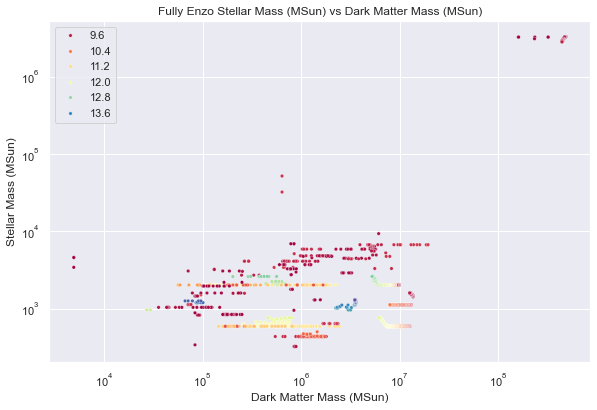

In [83]:
seaborn.set(rc={'figure.figsize':(9.7,6.27)})
ax = seaborn.scatterplot(x=dark_matter_masses, y=stellar_masses, hue=redshifts, palette='Spectral',s=12)
ax.set_title('Fully Enzo Stellar Mass (MSun) vs Dark Matter Mass (MSun)')
ax.set_xscale('log')
ax.set_xlabel('Dark Matter Mass (MSun)')
ax.set_yscale('log')
ax.set_ylabel('Stellar Mass (MSun)')

# Visualizing largest graph

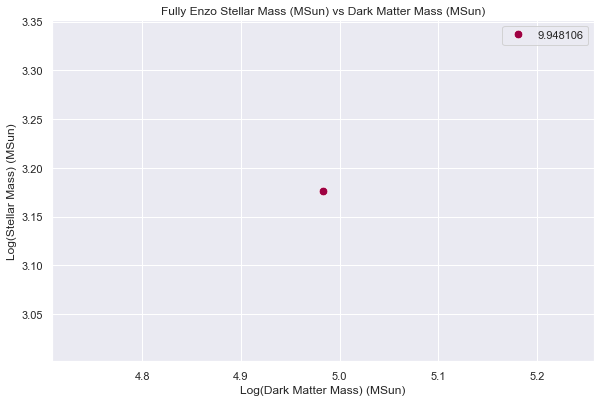

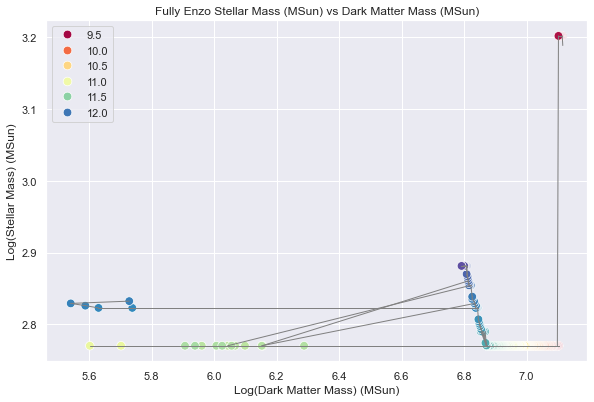

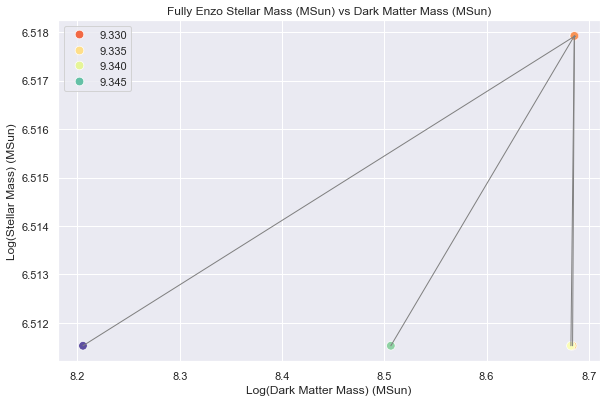

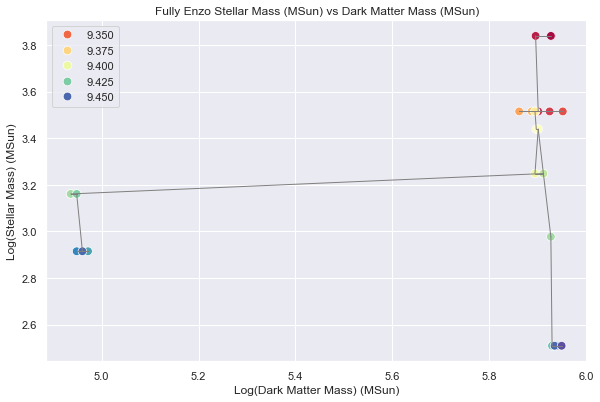

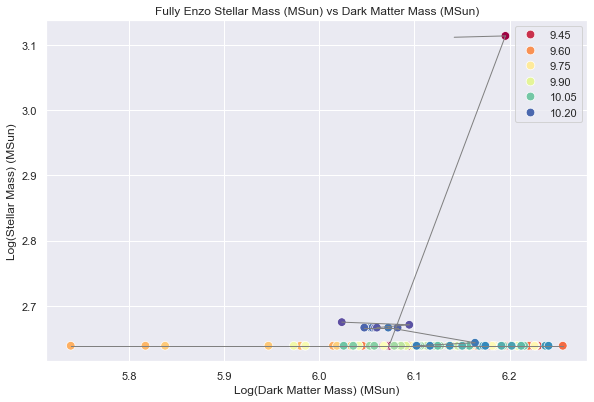

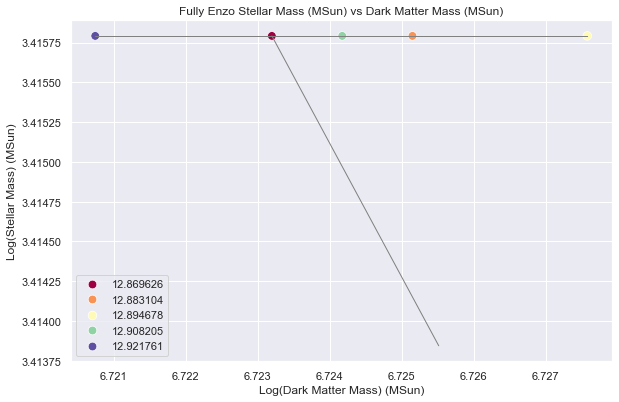

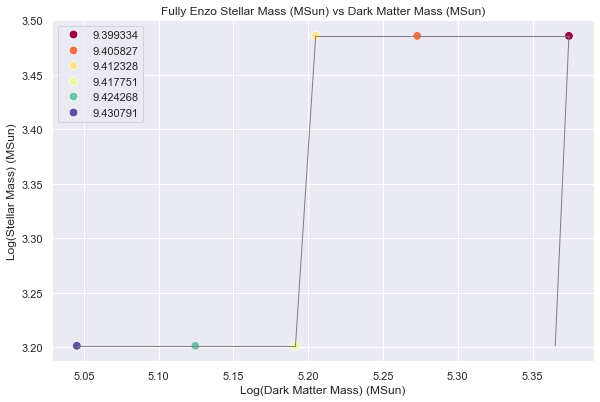

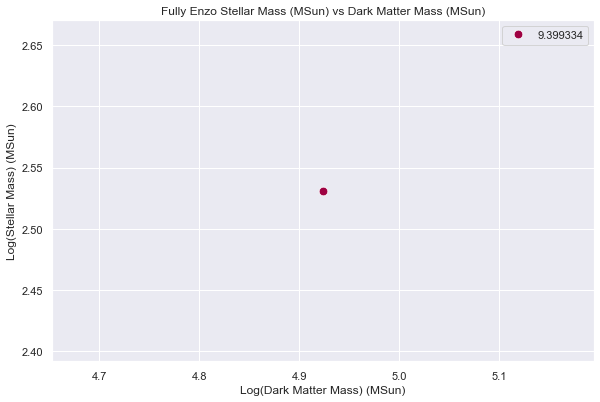

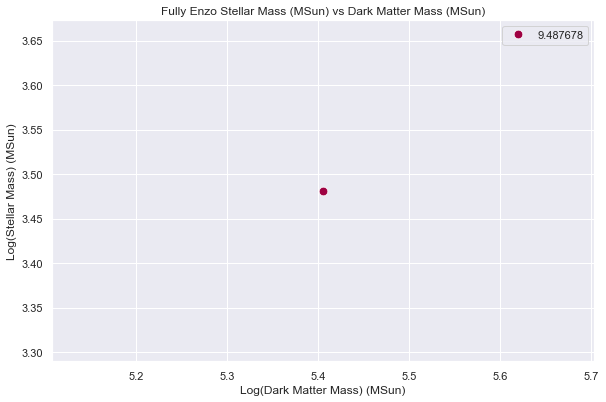

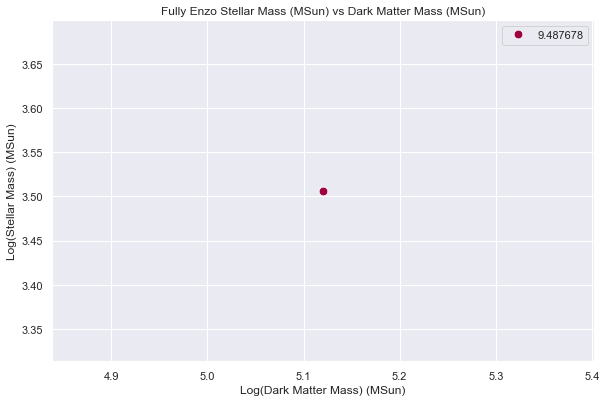

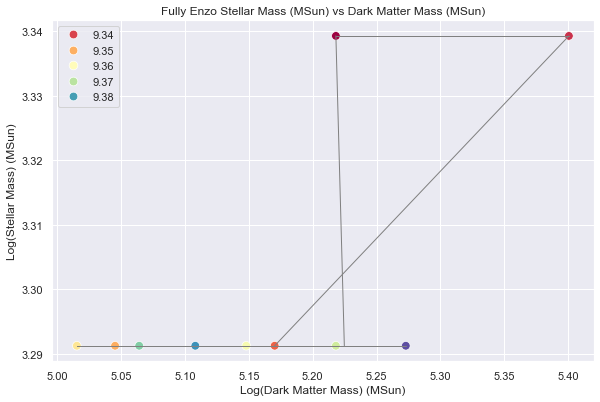

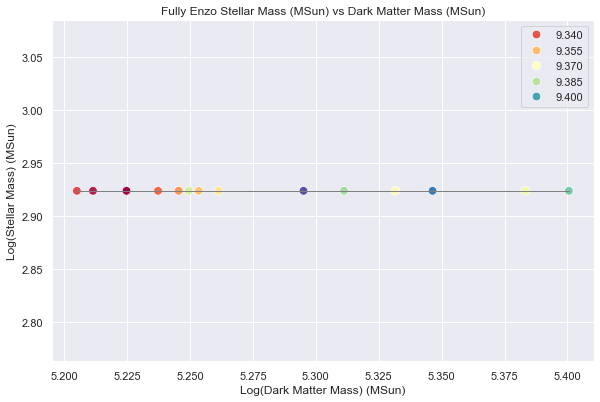

In [99]:
import numpy as np

graphs = torch.load("datasets/unpruned/SG256_SM_Only_Test.pt")
# graph_max_masses = [max(graph.y) for graph in graphs]
# graph_with_largest_halo = graphs[np.argmax(graph_max_masses)]

for curr_graph in graphs:
    dm_mass = np.log10(np.array(curr_graph.x)[:, 0])
    redshifts = np.array(curr_graph.x)[:, 1]
    sm_mass = np.log10(np.array(curr_graph.y))

    # Draw edges for most massive halo history
    biggest_sm_halo_idx = np.argmax(sm_mass)
    edges = np.array(curr_graph.edge_index.T)

    # Initialize visited nodes
    visited = set()

    def reverse_dfs(curr_node):
        visited.add(curr_node)
        for edge in edges:
            if edge[1] == curr_node and edge[0] not in visited:
                reverse_dfs(edge[0])
    
    # DFS from largest edge to find ones connected to it
    reverse_dfs(biggest_sm_halo_idx)

    # Draw edges if nodes were visited in dfs
    for edge in edges:
        source = edge[0]
        target = edge[1]
        if source in visited:
            x_values = [dm_mass[source], dm_mass[target]]
            y_values = [sm_mass[source], sm_mass[target]]
            plt.plot(x_values, y_values, color="gray", linestyle="-", linewidth=1)

    # Draw scatterplot for visited edges
    visited = np.array(list(visited))
    ax = seaborn.scatterplot(
        x=dm_mass[visited], y=sm_mass[visited], hue=redshifts[visited], palette="Spectral", s=75
    )
    ax.set_title("Fully Enzo Stellar Mass (MSun) vs Dark Matter Mass (MSun)")
    ax.set_xlabel("Log(Dark Matter Mass) (MSun)")
    ax.set_ylabel("Log(Stellar Mass) (MSun)")

    plt.show()

# Visualizing SM vs no SM classifying

In [85]:
full_graphs = torch.load('datasets/SG256_Full_Graphs_From_Enzo.pt')

dark_matter_masses = []
stellar_masses = []
redshifts = []
for graph in full_graphs:
  for x in graph.x:
    dark_matter_masses.append(x[0].item())
    redshifts.append(x[1].item())
  for y in graph.y > 0:
    stellar_masses.append(y.item())

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/SG256_Full_Graphs_From_Enzo.pt'

Text(0, 0.5, 'Redshift')

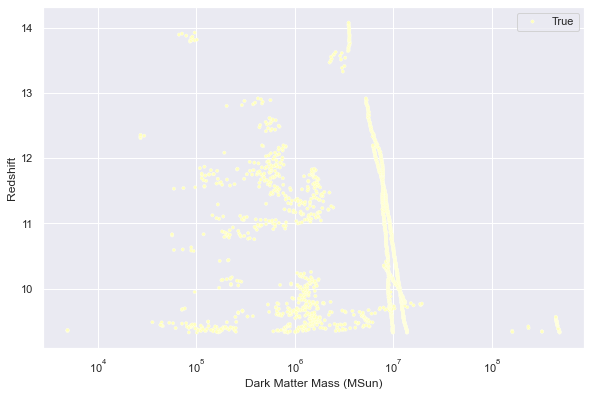

In [ ]:
seaborn.set(rc={'figure.figsize':(9.7,6.27)})
ax = seaborn.scatterplot(x=dark_matter_masses, y=redshifts, hue=stellar_masses, palette='Spectral',s=12)
ax.set_xscale('log')
ax.set_xlabel('Dark Matter Mass (MSun)')
ax.set_ylabel('Redshift')